# **Laboratorijska vježba 2**: Vizualizacija podataka

> Provođenje vizualizacije podataka dio je zadnjeg koraka koje uobičajeno provodi podatkovni znanstvenik, odnosno koraka **komunikacije zaključaka**. U tom koraku, u pravilu se prave razni izvještaji, vizualiziraju zaključci te donose poslovne odluke. Podatkovni znanstvenici u tu svrhu pripremaju analize u lako čitljivim oblicima, kao što su dijagrami, grafikoni i izvješća.

> Međutim, vizualizacija podataka često se izvodi i u ranijim koracima koje provodi podatkovni znanstvenik. Već pri samom rukovanju, opisivanju i sažimanju podataka, nije neuobičajeno voditi se grafovima koji prikazuju razne obrasce, raspone i pristranosti u podacima. Tako je vizualizacijom vrlo lako utvrditi korelaciju između dvije značajke, pronaći stršeće vrijednosti (engl. *outliers*) te utvrditi raspone u kojima se nalaze vrijednosti za neki stupac. Znati kako pravilno implementirati tehnike vizualizacije podataka alat je koji mora imati svaki podatkovni znanstvenik.


> U ovoj laboratorijskoj vježbi pozabavit ćemo se vizualizacijom podataka, kao tehnikom koja je obuhvaćena većinom koraka koje tipično provodi podatkovni znanstvenik. U tu svrhu korist ćemo biblioteke Seaborn i Matplotlib.

---

## **Vizualizacija podataka**

## **Osnovne vrste dijagrama**

U području vizualizacije podataka postoji širok izbor raznih dijagrama koji pomažu u razumijevanju trendova, obrazaca i uspostavljanju korelacija. Neki od njih objašnjeni su u nastavku:

1.   Linijski dijagram - prikazuje informacije kao niz podatkovnih točaka zvanih "markeri" povezanih ravnim linijskim segmentima
2.   Stupčasti dijagram - prikazuje kategoričke podatke s pravokutnim stupcima s visinama ili duljinama proporcionalnim vrijednostima koje predstavljaju.
3.   Histogram - predstavlja približan prikaz distribucije numeričkih podataka. 
4.   Dijagram raspršenosti (engl. *scatter plot*) - koristi kartezijeve koordinate za prikaz vrijednosti za tipične dvije varijable iz skupa podataka.
5.   Kružni dijagram (engl. *pie chart*) - kružna statistička grafika koja je podijeljena na dijelove za ilustraciju numeričkog omjera. Duljina luka svake "kriške" proporcionalna je količini koju predstavlja.
6.   Dijagrami pravokutnika (engl. *box plots*) - metoda za grafičko prikazivanje lokaliteta, širenja i grupa asimetrije numeričkih podataka kroz njihove kvartile. 
7.   Violinski dijagrami - metoda iscrtavanja numeričkih podataka. Slični su dijagramima pravokutnika, osim što također pokazuju gustoću vjerojatnosti podataka za različite vrijednosti, obično izglađenu procjenom gustoće jezgre. 


## **Kako odabrati prikladan dijgram?**

Dijagrami se u osnovi koriste za vizualizaciju odnosa između dviju ili više varijabli. Te varijable mogu biti potpuno numeričke ili predstavljati kategorije poput grupe, klase ili odjela. S obzirom na namjeru dijagrama, moguće ih je podijeliti u nekoliko kategorija:

*   Relacijski dijagrami - koristi se za razumijevanje odnosa između dviju varijabli. 
*   Kategorički dijagrami - bave se kategoričkim varijablama i načinom na koje se one mogu vizualizirati. 
*   Dijagrami distribucije - koriste se za ispitivanje univarijatnih i bivarijatnih distribucija.
*   Regresijski dijagrami - primarno su namijenjeni dodavanju vizualnog vodiča koji pomaže naglasiti obrasce u skupu podataka tijekom istraživačke analize podataka.
*   Matrični dijagrami - predstavljaju nizove dijagrama raspršenosti.

 

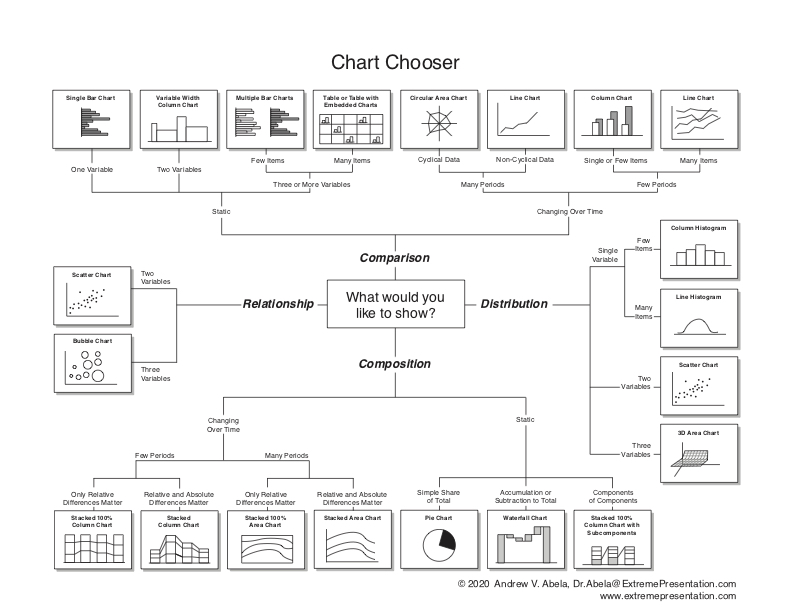


## **Uvod u biblioteke Seaborn i Matplotlib**

U ovoj laboratorijskoj vježbi upoznat ćemo se s osnovnim svojstvima biblioteka Seaborn i Matplotlib.

> Matplotlib jest biblioteka za vizualizaciju u programskom jeziku Python koja se primarno koristi za iscrtavanje 2D nizova. Ova biblioteka može se pokrenuti na brojnim platformama, a izgrađena je na temelju biblioteke NumPy te je dizajnirana za rad sa širim SciPy okruženjem [[1]](https://medium.com/analytics-vidhya/introduction-to-matplotlib-and-seaborn-e2dd04bfc821). 

> Seaborn jest biblioteka za vizualizaciju za iscrtavanje statističke grafike u programskom jeziku Python. Ona nudi pregršt zadanih stilova i palete boja kako bi statistički grafikoni izgledali bolje. Izgrađena je na temelju biblioteke Matplotlib te je usko integrirana u strukture podataka iz biblioteke Pandas. Seaborn ima za cilj vizualizaciju učiniti središnjim dijelom istraživanja i razumijevanja podataka. Omogućuje API-je orijentirane na skup podataka te tako omogućava lako prebacivanje između različitih vizualnih prikaza za iste varijable radi boljeg razumijevanja skupa podataka [[1]](https://medium.com/analytics-vidhya/introduction-to-matplotlib-and-seaborn-e2dd04bfc821).  

Osnovna razlika između dvije biblioteke jest ta što je Matplotlib namijenjen za općenito crtanje, dok Seaborn olakšava pružanje uvida u složenije (statističke) obrasce u podacima. Osim toga, biblioteka Matplotlib radi sa serijama i nizovima, dok Seaborn radi s cijelim DataFrame-ovima. U biblioteci Matplotlib objekt koji se koristi za crtanje pamti stanje (engl.*stateful*), dok to nije slučaj u biblioteci Seaborn koja zahtijeva prosljeđivanje objekta za crtanje metodi *plot()*. 

Biblioteka Matplotlib nudi interaktivni način rada u Juypter Notebook okruženju. S druge, ako pišete skripte u Pythonu, obavezno na kraju skripte morate pokrenuti *plt.show()* metodu kako bi se prikazao definirani graf. Interaktivno iscrtavanje unutar Python bilježnice može se izvesti naredbom %matplotlib. Tada će svaka naredba *plot()* uzrokovati otvaranje prozora dijagrama, a daljnje naredbe mogu se pokrenuti za ažuriranje dijagrama. Neke promjene (kao što je modificiranje svojstava linija koje su već nacrtane) neće se automatski odraziti na slici; no za prisilno ažuriranje moguće je pokrenuti metodu *plt.draw()*.

U Python bilježnici također je moguće ugraditi dijagrame izravno u bilježnicu, s dvije moguće opcije:

1.   %matplotlib notebook - rezultira interaktivnim dijagramima ugrađenim u bilježnicu.
2.   %matplotlib inline - rezultira statičnim dijagramima ugrađenim u bilježnicu.

U ovoj laboratorijskoj vježbi primarno ćemo koristiti %matplotlib inline opciju.



In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

U biblioteci Matplotlib metoda *figure()* generira instancu klase *plt.Figure* koja se može smatrati spremnikom koji sadrži sve objekte koji predstavljaju osi, grafiku, tekst i oznake. Osi iz tog objekta generiraju se pozivanjem metode *axes()*, a predstavljaju granični okvir (engl. *bounding box*) s kvačicama (engl. *ticks*) i oznakama (engl. *labels*). 

/var/folders/wt/rl1z13tx1kj7vknh9c51084w0000gn/T/ipykernel_95901/1233580877.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


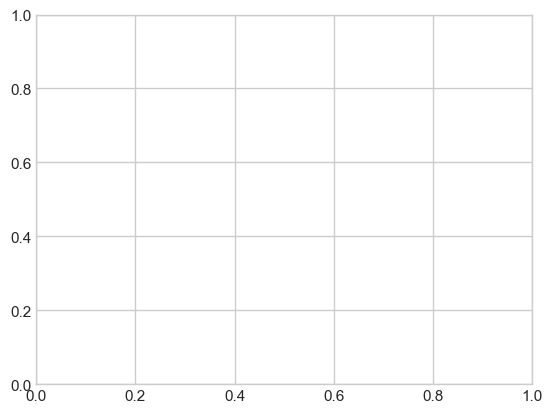

In [40]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

## **Linijski dijagrami**

Jedan od najjednostavnijih dijagrama jest linijski dijagram koji prikazuje informacije kao niz podatkovnih točaka zvanih "markeri" povezanih ravnim linijskim segmentima. Nakon što smo izradili osi, možemo koristiti metodu *ax.plot()* za crtanje dijagrama.

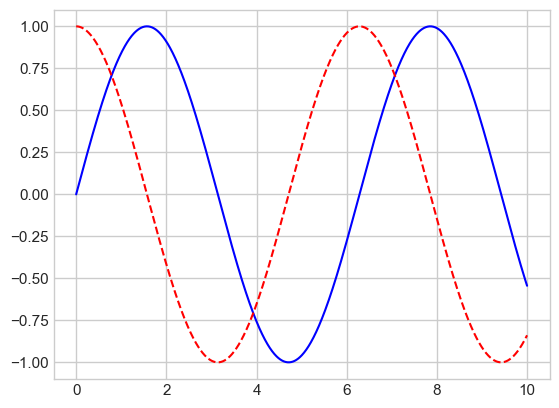

In [41]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), color='blue', linestyle='solid')
plt.plot(x, np.cos(x), color='red', linestyle='dashed')

Postoje mnogi drugi argumenti metode *plot()* koji se mogu koristiti za fino podešavanje izgleda crteža, a više o njima može se pročitati u dokumentaciji metode [[3]](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

Matplotlib obavlja pristojan posao odabira zadanih ograničenja osi za Vaš crtež, ali ponekad je lijepo imati finiju kontrolu. Najosnovniji način podešavanja granica osi jest korištenje metoda plt.xlim() i plt.ylim().

(-1.5, 1.5)

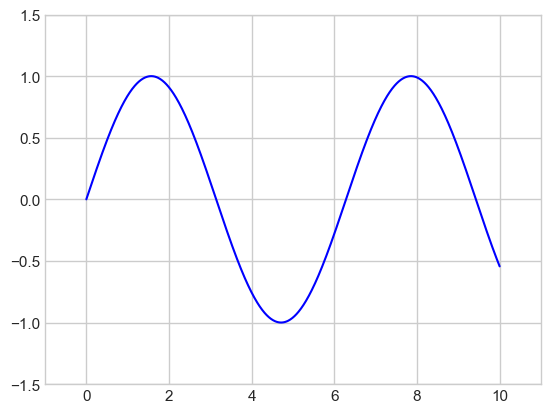

In [44]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), color='blue', linestyle='solid')

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

Korisna srodna metoda jest *plt.axis()* koja omogućuje postavljanje x i y ograničenja jednim pozivom, prosljeđivanjem popisa koji specificira [xmin, xmax, ymin, ymax].

(-1.0, 11.0, -1.5, 1.5)

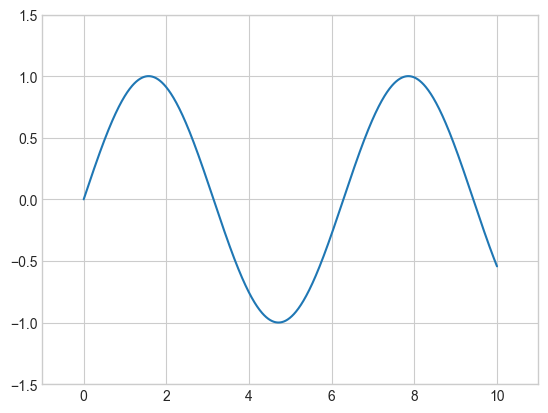

In [5]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])


Osim toga, metoda plt.axis() vrlo jednostavno omogućava stezanje ograničenja za osi ili pak osigurava jednak raspon za obje osi:

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

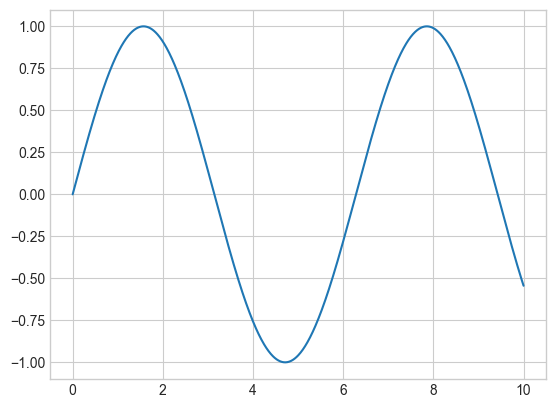

In [6]:
plt.plot(x, np.sin(x))
plt.axis('tight')

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

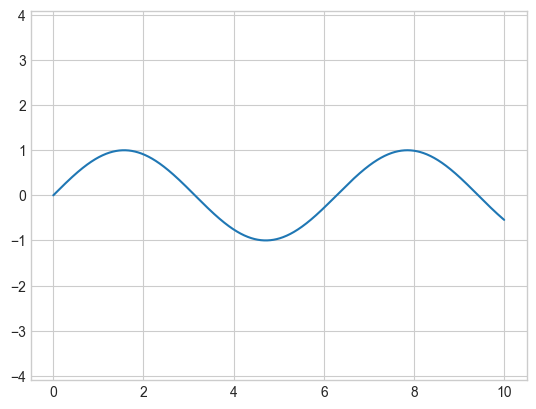

In [7]:
plt.plot(x, np.sin(x))
plt.axis('equal')

Također ćemo se ukratko osvrnuti na označavanje dijagrama, odnosno postavljanje naslova, oznaka osi i jednostavne legende. Biblioteka Matplotlib nudi metode za njihovo jednostavno postavljanje.

Text(0, 0.5, 'sin(x)')

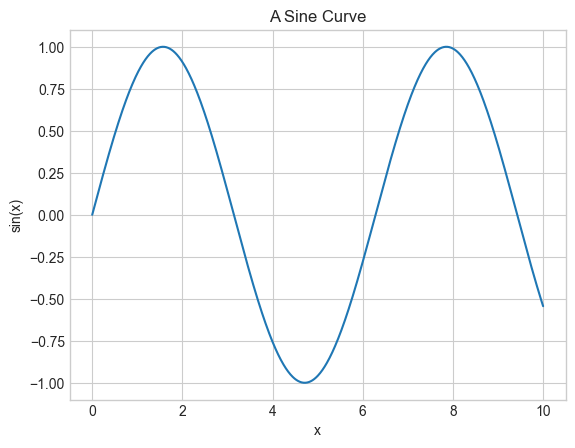

In [8]:
plt.plot(x, np.sin(x))
plt.title('A Sine Curve')
plt.xlabel('x')
plt.ylabel('sin(x)')

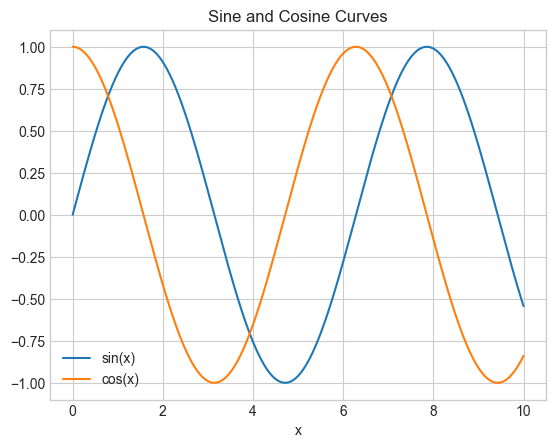

In [9]:
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.title('Sine and Cosine Curves')
plt.xlabel('x')
plt.legend()


## **Stupčasti dijagrami**

Stupčasti dijagram uobičajeno predstavlja kategoriju podataka s pravokutnim stupcima s duljinama i visinama koje su proporcionalne vrijednostima koje predstavljaju. Mogu se crtati vodoravno ili okomito, a služi za usporedbu diskretnih kategorija. Jedna od osi dijagrama predstavlja specifične kategorije koje se uspoređuju, dok druga os predstavlja izmjerene vrijednosti koje odgovaraju tim kategorijama.

Biblioteka Matplotlib pruža metodu *bar()* koja stvara stupčasti dijagram na temelju podataka i zadanih parametara - visini, širini, dnu i poravnanju.

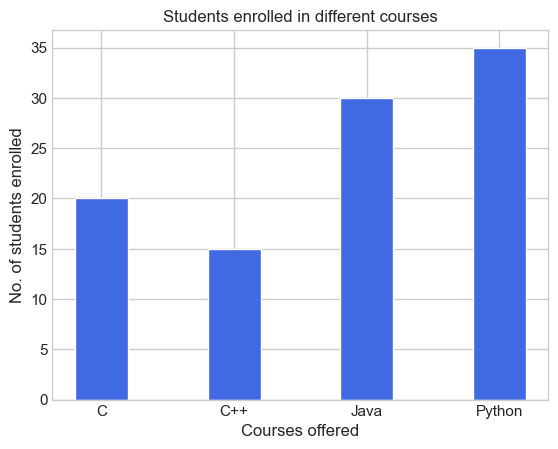

In [48]:
data = {'C': 20, 'C++':15, 'Java':30, 'Python':35}
courses = list(data.keys())
values = list(data.values())

plt.bar(courses, values, color='royalblue', width=0.4)
plt.xlabel('Courses offered')
plt.ylabel('No. of students enrolled')
plt.title('Students enrolled in different courses')
plt.show()

Višestrukti stupčasti dijagrami koriste se kada je potrebno izvršiti usporedbu skupa podataka kada se jedna varijabla mijenja. Moguće ga je jednostavno pretvoriti u naslagani trakasti dijagram, gdje je svaka podskupina prikazana jedna iznad drugih. Može se iscrtati mijenjanjem debljine i položaja šipki.

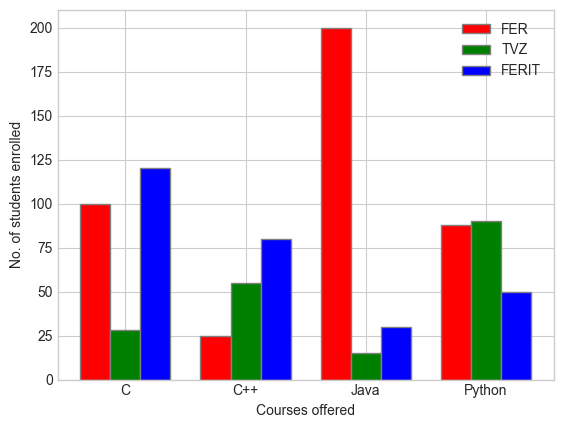

In [11]:
barWidth = 0.25
courses = ['C', 'C++', 'Java', 'Python']

FER = [100, 25, 200, 88]
TVZ = [28, 55, 15, 90]
FERIT = [120, 80, 30, 50]

br1 = np.arange(len(FER))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, FER, color='r', width=barWidth, edgecolor='grey', label='FER')
plt.bar(br2, TVZ, color='g', width=barWidth, edgecolor='grey', label='TVZ')
plt.bar(br3, FERIT, color='b', width=barWidth, edgecolor='grey', label='FERIT')

plt.xlabel('Courses offered')
plt.ylabel('No. of students enrolled')
plt.xticks([r + barWidth for r in range(len(FER))], courses)

plt.legend()
plt.show()

## **Dijagram raspršenosti**

Drugi često korišteni tip dijagrama jest jednostavni dijagram raspršenosti. Umjesto da točke budu spojene segmentima linija, ovdje su točke pojedinačno predstavljene točkom, krugom ili drugim oblikom.

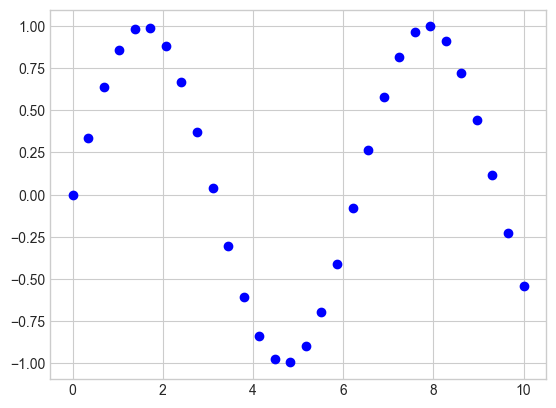

In [12]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.scatter(x, y, marker='o', color='blue')

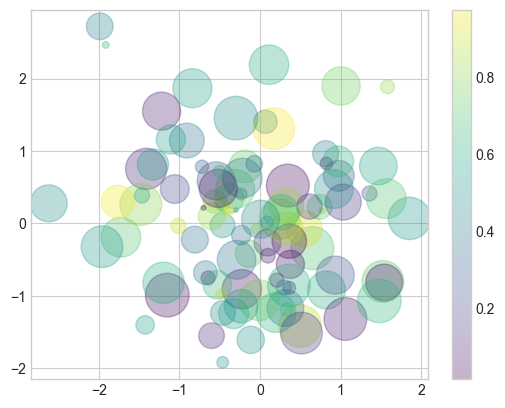

In [13]:
rng = np.random.RandomState(42)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()

## **Histogrami**

Histogrami mogu biti odličan prvi korak u razumijevanju skupa podataka. Biblioteka Matplotlib nudi metodu hist() za stvaranje i prilagođavanje historagrama.

(array([  2.,   0.,   2.,   2.,   4.,   6.,  14.,  15.,  31.,  39.,  59.,
         79.,  79.,  80.,  75., 101.,  90.,  74.,  62.,  61.,  48.,  28.,
          8.,  18.,  15.,   3.,   3.,   0.,   1.,   1.]),
 array([-3.35035318, -3.12415808, -2.89796298, -2.67176788, -2.44557277,
        -2.21937767, -1.99318257, -1.76698747, -1.54079237, -1.31459727,
        -1.08840217, -0.86220706, -0.63601196, -0.40981686, -0.18362176,
         0.04257334,  0.26876844,  0.49496354,  0.72115864,  0.94735375,
         1.17354885,  1.39974395,  1.62593905,  1.85213415,  2.07832925,
         2.30452435,  2.53071946,  2.75691456,  2.98310966,  3.20930476,
         3.43549986]),
 [<matplotlib.patches.Polygon at 0x129a8b210>])

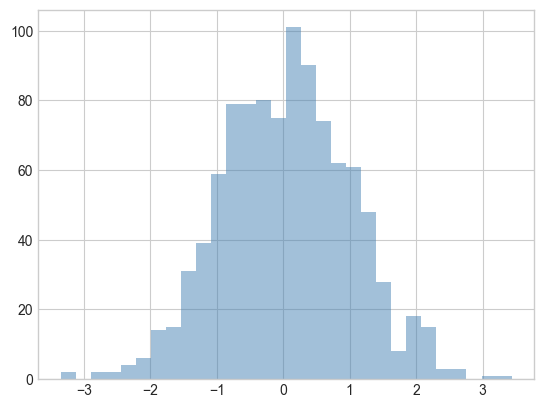

In [14]:
data = np.random.randn(1000)
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

(array([ 1.,  0.,  1.,  0.,  1.,  5.,  4.,  8.,  4.,  3., 16., 20., 19.,
        12., 18., 29., 25., 39., 29., 34., 42., 32., 45., 40., 38., 50.,
        40., 37., 44., 53., 45., 40., 39., 33., 31., 17., 24., 12., 18.,
        11.,  7.,  7.,  8.,  4.,  3.,  4.,  3.,  1.,  2.,  2.]),
 array([-3.26818904, -3.0220122 , -2.77583537, -2.52965853, -2.2834817 ,
        -2.03730486, -1.79112803, -1.54495119, -1.29877436, -1.05259753,
        -0.80642069, -0.56024386, -0.31406702, -0.06789019,  0.17828665,
         0.42446348,  0.67064032,  0.91681715,  1.16299399,  1.40917082,
         1.65534766,  1.90152449,  2.14770133,  2.39387816,  2.640055  ,
         2.88623183,  3.13240867,  3.3785855 ,  3.62476234,  3.87093917,
         4.11711601,  4.36329284,  4.60946968,  4.85564651,  5.10182335,
         5.34800018,  5.59417702,  5.84035385,  6.08653068,  6.33270752,
         6.57888435,  6.82506119,  7.07123802,  7.31741486,  7.56359169,
         7.80976853,  8.05594536,  8.3021222 ,  8.54829903,

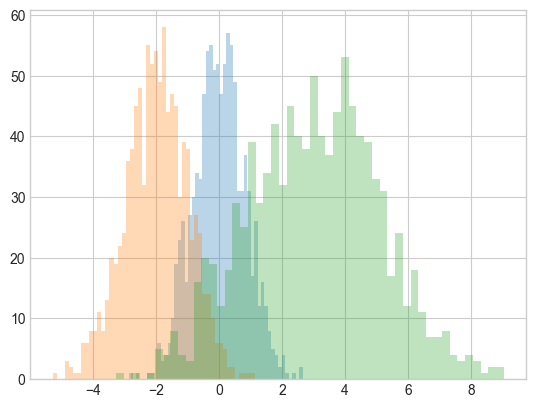

In [15]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=50)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

Metoda *histogram()* može se koristiti za izračunavanje histograma, odnosno broja točaka u spremnicima histograma:

In [16]:
data = np.random.randn(1000)
counts, bin_edges = np.histogram(data, bins=5)
counts

array([ 43, 276, 465, 198,  18])

In [17]:
bin_edges

array([-2.95546534, -1.68163004, -0.40779474,  0.86604056,  2.13987587,
        3.41371117])

## **Dijagrami pravokutnika (engl. *box plots*)**

U deskriptivnoj statistici, dijagrami pravokutnika predstavljaju metodu za grafičko prikazivanje lokaliteta, širenja i grupa asimetrije numeričkih podataka kroz njihove kvartile.

{'whiskers': [<matplotlib.lines.Line2D at 0x129bd9290>,
 'caps': [<matplotlib.lines.Line2D at 0x129bda6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x129bbd6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x129bdb610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1299a3dd0>],
 'means': []}

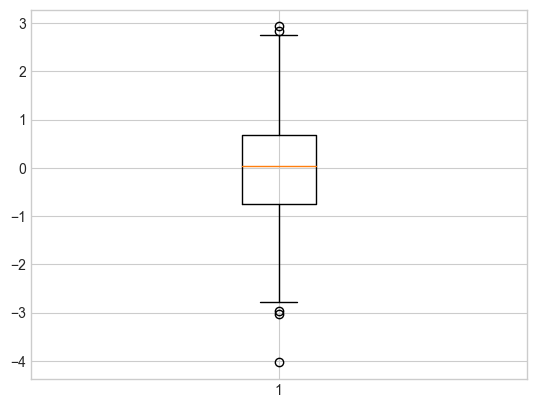

In [18]:
data = np.random.randn(1000)
plt.boxplot(data)

([<matplotlib.axis.XTick at 0x129bb4090>,
 [Text(1, 0, 'x1'), Text(2, 0, 'x2'), Text(3, 0, 'x3')])

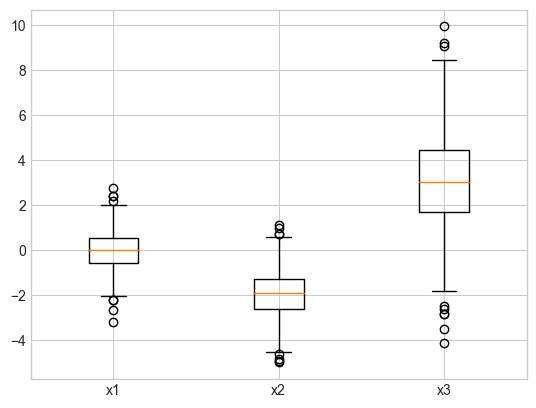

In [19]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

data = [x1, x2, x3]
plt.boxplot(data)
plt.xticks(range(1,4), ['x1', 'x2', 'x3'])

## **Vizualiziranje grešaka**

Za svako znanstveno mjerenje, točno obračunavanje pogrešaka gotovo je jednako važnost, ako ne i važnije, od točnog izvještavanja o samom broju. U vizualizaciji podataka i rezultata, učinkovito prikazivanje ovih pogrešaka može učiniti da dijgrama prenese puno potpunije rezultate.

<ErrorbarContainer object of 3 artists>

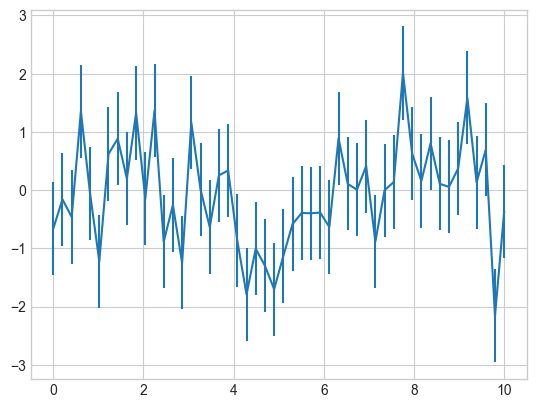

In [20]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy)

<ErrorbarContainer object of 3 artists>

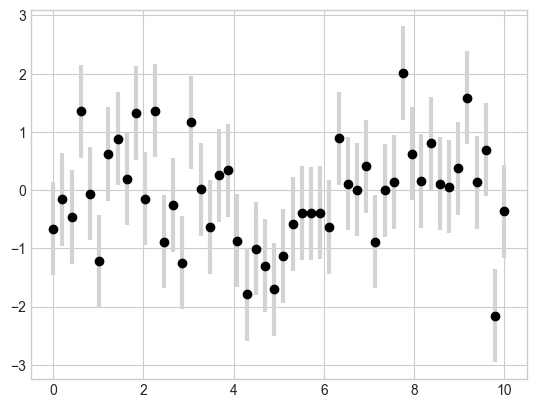

In [21]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

U nekim situacijama poželjno je prikazati trake pogrešaka na kontinuiranim količinama. Iako biblioteka Matplotlib nema ugrađenu prikladnu rutinu za ovu namjenu, relativno je lako kombinirati metode *plt.plot()* i *plt.fill_between()* za koristan rezultat.

## **Dijagrami gustoće i konture**

Ponekad je potrebno prikazati trodimenzionalne podatke u dvije dimenzije pomoću kontura ili područja označenih bojama. U tu svrhu, biblioteka Matplotlib nudi tri metode: *plt.contour()* za iscrtavanje kontura, *plt.contourf()* za popunjavanje dijagrama iscrtanih konturama te *plt.imshow()* za prikazivanje slika. Pritom se često koristi metoda *np.meshgrid()* koja stvara dvodimenzionalne mreže iz jednodimenzionalnih nizova.


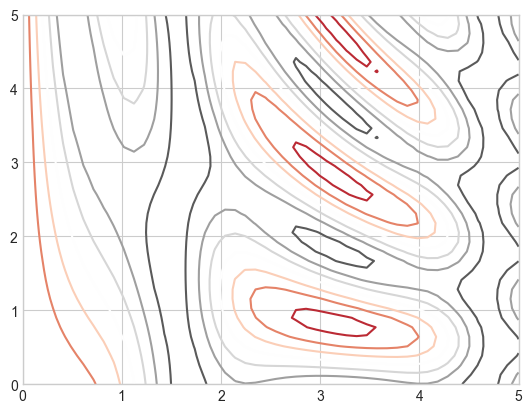

In [22]:
def f(x,y):
  return np.sin(x) ** 10 + np.cos(10 + y*x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, cmap='RdGy')

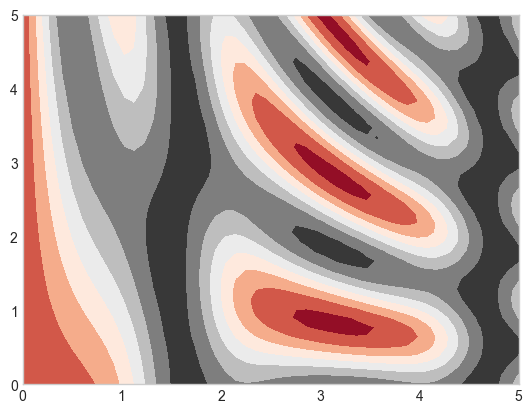

In [23]:
plt.contourf(X, Y, Z, cmap='RdGy')

Dijagram u boji jasno pokazuje da su crna područja "vrhovi", dok su crvena područja "doline".

## **Višestruki dijagrami**

Ponekad je korisno usporediti različite poglede na podatke jedan pored drugog. U tu svrhu, biblioteka Matplotlib ima koncept višestrukih dijagrama. Oni mogu biti umetci, rešetke dijagrama ili drugi kompliciraniji izgledi. Najosnovnija metoda stvaranja osi jest korištenje funkcije *plt.axes()*. Prema zadanim postavkama, ona stvara standardni objekt osi koji ispunjava cijeli dijagram. Ova funkcija također prima i proizvoljni argument koji je popis od četiri broja u koordinatnom sustavu. Ovi brojevi predstavljaju *[bottom, left, width, height]* u koordinatnom sustavu dijagrma, a kreću se od 0 u donjem lijevom kutu do 1 u gornjem desnom kutu slike.  



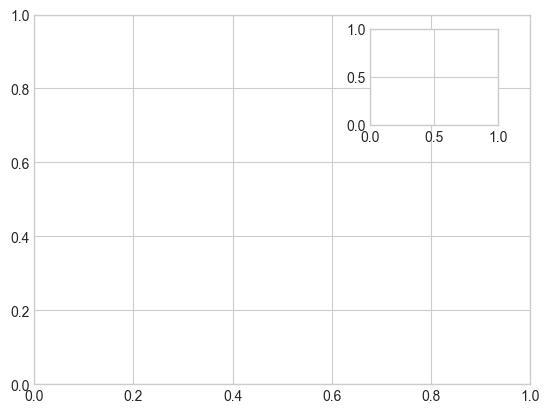

In [24]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Poravnani stupci ili redovi višestrukih dijagrama uobičajena su praksa toliko da Matplotlib ima nekoliko praktičnih rutina koje olakšavaju njihovu izradu. Najniža razina od njih je *plt.subplot()* koja stvara jedan poddijagram unutar mreže. Ova metoda prima tri cjelobrojna argumenta - broj redaka, broj stupaca i indeks dijagrama koji treba stvoriti u ovoj shemi, a koji ide od gornjeg lijevog do donjeg desnog kuta.

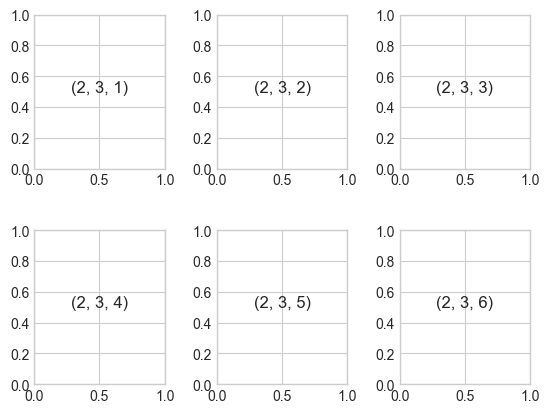

In [25]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
  plt.subplot(2, 3, i)
  plt.text(0.5, 0.5, str((2,3,i)), fontsize=12, ha='center')

Upravo opisani pristup može postati prilično zamoran pri stvaranju velike mreže višestrukih dijagrama, osobito ako je potrebno sakriti oznake x i y osi na unutarnjim crtama. U tu svrhu, metoda *plt.subplots()* predstavlja lakši alat za stvaranje višestrukih dijagrama. Umejsto stvaranja jednog po jednog poddijagrama, ova metoda stvara punu mrežu poddijagrama u jednom retku, vraćajući ih u NumPy nizu. Argumenti su broj redataka te broj stupaca, uz neobavezne ključeve *sharex* i *sharey*, koji omogućuju određivanje odnosa između osi.

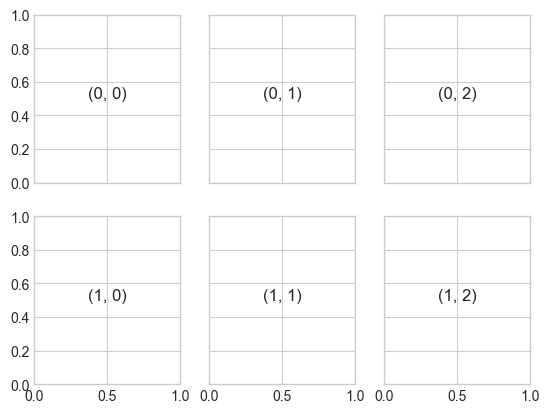

In [26]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

for i in range(2):
  for j in range(3):
    ax[i,j].text(0.5, 0.5, str((i,j)), fontsize=12, ha='center')

## **Napredno podešavanje dijagrama**

Zadane postavke lokatora i formatera u biblioteci Matplotlib dizajnirane su da budu općenito dovoljne u mnogim uobičajenim situacijama. No, nisu uvijek optimalne za svaku vrstu dijagrama. Ako imate potrebu prilagoditi razne dijelove dijagrama u detalje, mogu se koristiti specijalizirane metode iz biblioteke za tu svrhu. Više o takvim metodama može se pročitati u dokumentaciji [[5]](https://matplotlib.org/stable/api/index.html). 


## **Biblioteka Seaborn**

Biblioteka Seaborn pruža API na temelju biblioteke Matplotlib koji nudi razumne izbore za stil iscrtavanja i zadane boje, definira jednostavne funkcije visoke razine za uobičajene tipove podataka statističkih iscrtavanja i integrira se s funkcijom koju pruža DataFrame iz biblioteke Pandas. 

Glavna ideja biblioteke Seaborn jest da pruža naredbe visoke razine za stvaranje različitih tipova dijagrama korisnih za istraživanje statističkih podataka, pa čak i prilagođavanje nekih statističkih modela. Tako smo primjerice, ranije crtali nekoliko histograma na istom dijagramu kako bi usporedili njihove distribucije. Umjesto histograma, možemo dobiti glatku procjenu distribucije koristeći procjenu gustoće jezgre, što Seabirn radi pomoću metode *sns.kdeplot()*.

In [27]:
import seaborn as sns
sns.set()

/var/folders/wt/rl1z13tx1kj7vknh9c51084w0000gn/T/ipykernel_95901/3688351988.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal([0,0,], [[5,2], [5,2]], size=2000)


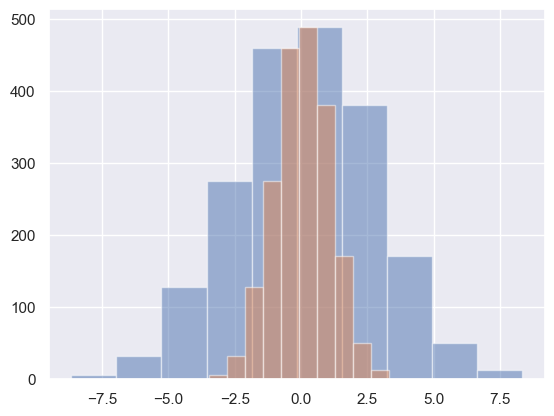

In [28]:
data = np.random.multivariate_normal([0,0,], [[5,2], [5,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
  plt.hist(data[col], alpha=0.5)


/var/folders/wt/rl1z13tx1kj7vknh9c51084w0000gn/T/ipykernel_95901/3422180709.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
/var/folders/wt/rl1z13tx1kj7vknh9c51084w0000gn/T/ipykernel_95901/3422180709.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


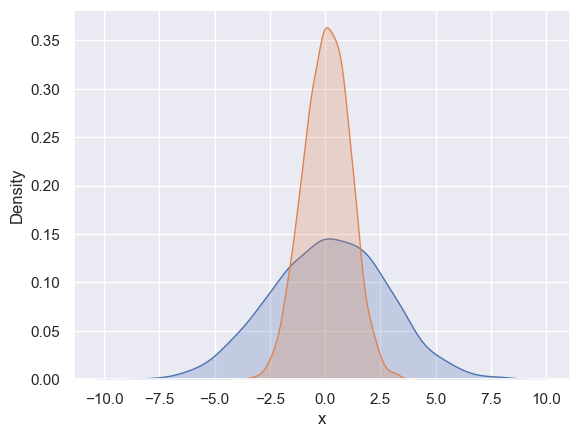

In [29]:
for col in 'xy':
  sns.kdeplot(data[col], shade=True)

Histogrami i procjena gustoće jezgre mogu se kombinirati pomoću metode *distplot()*:

/var/folders/wt/rl1z13tx1kj7vknh9c51084w0000gn/T/ipykernel_95901/1434035054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])
/var/folders/wt/rl1z13tx1kj7vknh9c51084w0000gn/T/ipykernel_95901/1434035054.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y'])


<Axes: xlabel='y', ylabel='Density'>

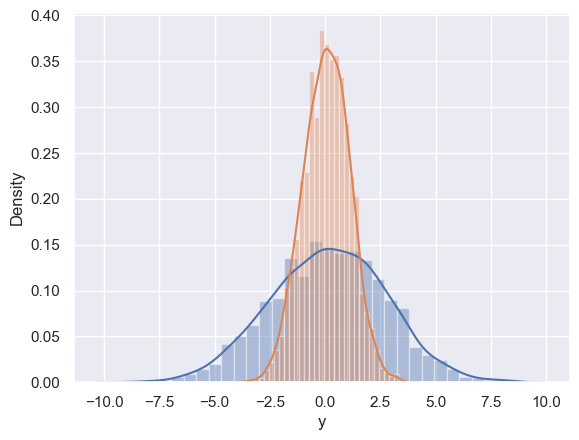

In [30]:
sns.distplot(data['x'])
sns.distplot(data['y'])

Nadalje, biblioteka Seaborn omogućava prikaz različitih tipova dijagrama na istom dijagramu, pomoću metode *sns.joinplot()*. Argument metode *kind* ukazuje na tip dijagrama koji se prikazuje izvan rubova dijagrama (primjerice, 'hex' za stupčasti dijagram, 'kde' za procjenu gustoće jezgre,...).

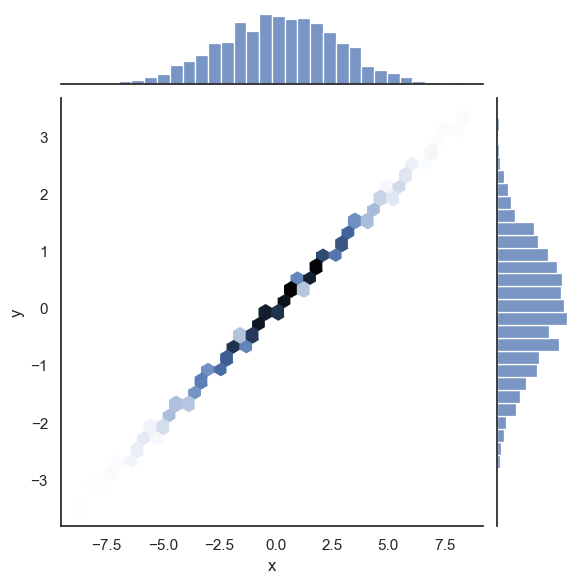

In [31]:
with sns.axes_style('white'):
  sns.jointplot(data=data, x='x', y='y', kind='hex')

Kada generalizirate zajedničke dijagrame na skupove podataka većih dimenzija dobit ćete parove dijagrama. Ovo je vrlo korisno za istraživanje korelacija između višedimenzionalnih podataka, kada želite iscrtati sve parove vrijednosti jedne naspram drugih.

Prikazat ćemo korist parova dijagrama na primjeru skupa podataka *Iris*:

In [32]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


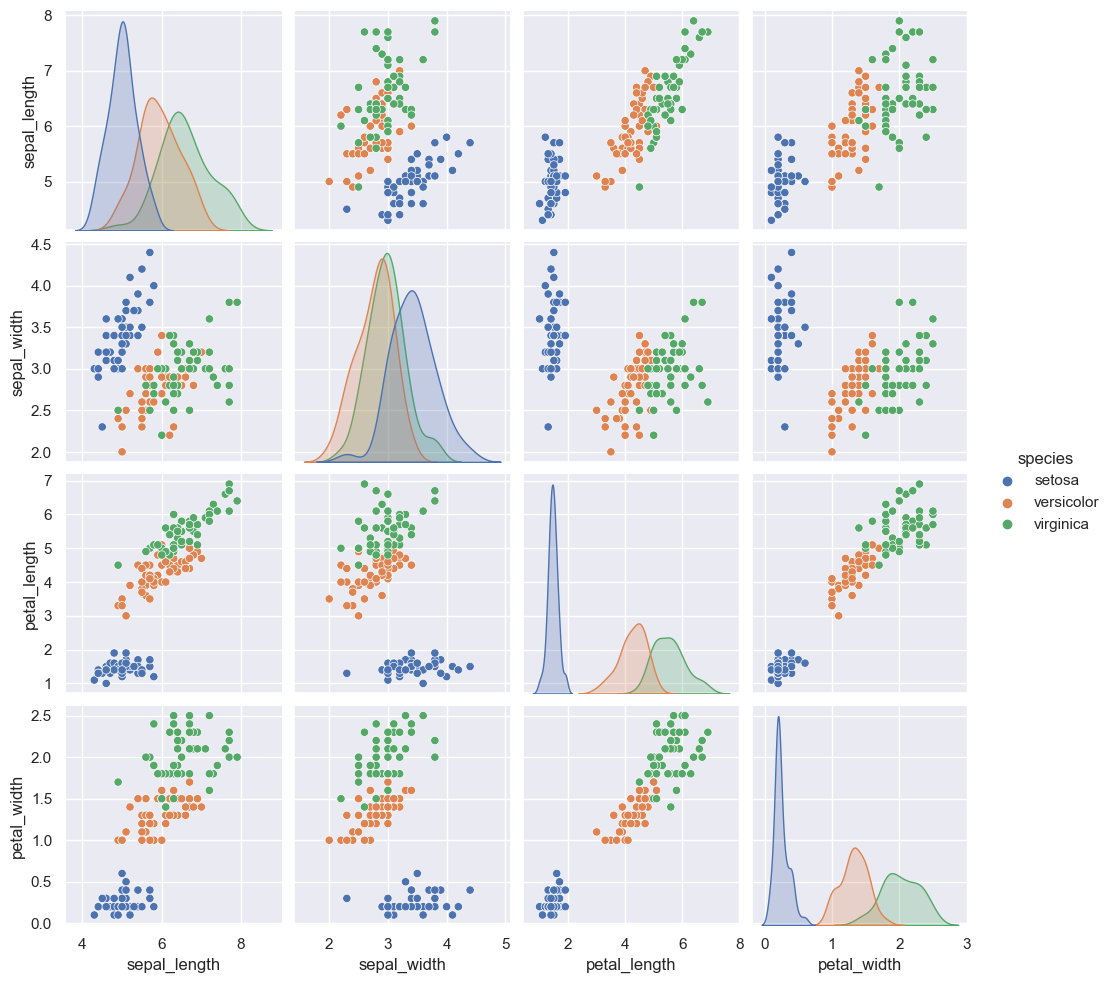

In [33]:
sns.pairplot(iris, hue='species', height=2.5)

Nadalje, unutar biblioteke Seaborn, znatno je lakše kreirati stupčaste dijagrame, dijagrame pravokutnika te violinske dijagrame na temelju DataFrame-a iz biblioteke Pandas.

In [34]:
courses = ['C', 'C++', 'Java', 'Python']

FER = [100, 25, 200, 88]
TVZ = [28, 55, 15, 90]
FERIT = [120, 80, 30, 50]
FESB = [55, 19, 75, 200]


data = pd.DataFrame({'attendees': [100, 28, 120, 55, 25, 55, 80, 19, 200, 15, 30, 75, 88, 90, 50, 200],
                     'course': ['C','C','C', 'C','C++','C++','C++', 'C++', 'Java', 'Java', 'Java', 'Java', 'Python', 'Python', 'Python', 'Python'],
                     'faculty': ['FER', 'TVZ', 'FERIT', 'FESB', 'FER', 'TVZ', 'FERIT', 'FESB', 'FER', 'TVZ', 'FERIT', 'FESB', 'FER', 'TVZ', 'FERIT','FESB']
                     })

data

,attendees,course,faculty
0,100,C,FER
1,28,C,TVZ
2,120,C,FERIT
3,55,C,FESB
4,25,C++,FER
5,55,C++,TVZ
6,80,C++,FERIT
7,19,C++,FESB
8,200,Java,FER
9,15,Java,TVZ


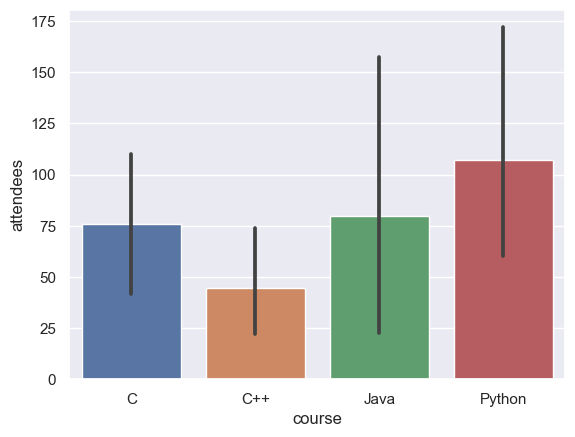

In [35]:
ax = sns.barplot(x='course', y='attendees', data=data)

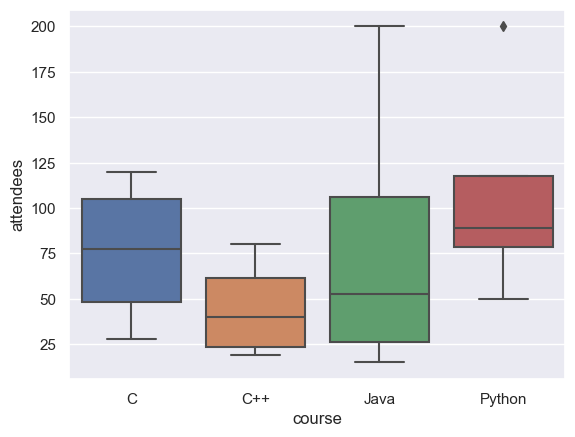

In [36]:
ax = sns.boxplot(x='course', y='attendees', data=data)

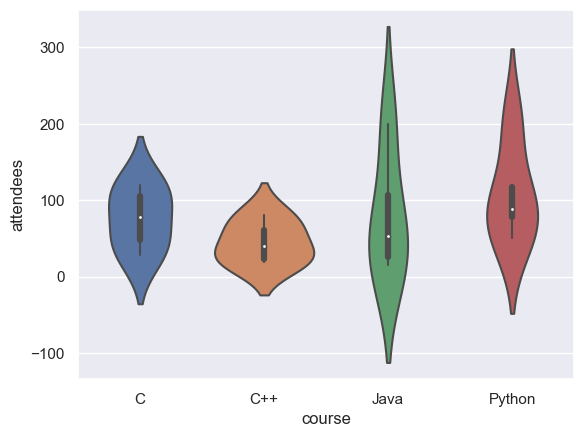

In [37]:
ax = sns.violinplot(x='course', y='attendees', data=data)

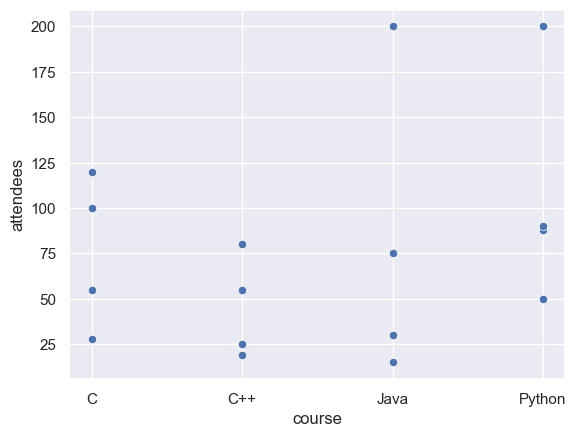

In [38]:
ax = sns.scatterplot(x='course', y='attendees', data=data)

Sve navedene grafove moguće je grupirati ovisno o broju i tipu varijabli koje nastoje vizualizirati:

*   Vizualizacija jedne varijable - histogram, dijagrami pravokutnika, violinski dijagrami
*   Vizualizacija dvije kontinuirane varijable - dijagram raspršenosti, dijagrami gustoće i konture, linijski dijagram
*   Vizualizacija dviju varijabli; kontinuirane i kategoričke - stupčasti dijagrami, dijagrami pravokutnika, violinski dijagrami

# **Literatura**


---

[1] https://medium.com/analytics-vidhya/introduction-to-matplotlib-and-seaborn-e2dd04bfc821 

[2] Materijali za predmet Applied Data Analysis (ADA) na EPFL

[3] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

[4] McKinney, W., 2012. *Python for data analysis*. O'Reilly Media, Inc.

[5] https://matplotlib.org/stable/api/index.html